In [136]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict

## Dostępne dane tray1.jpg … tray8.jpg, wszystkie zadania wykonać dla wszystkich zdjęć.

In [137]:
files = [cv.imread(f"./data/tray{i}.jpg") for i in range(1, 9)]

### Zad. 1 - 5p
Odnajdź na obrazach wszystkie monety 5 zł i 5 gr oraz oznacz które są które.

In [138]:
def show(img, cmap=None):
    plt.imshow(cv.cvtColor(img, cmap))
    plt.show()

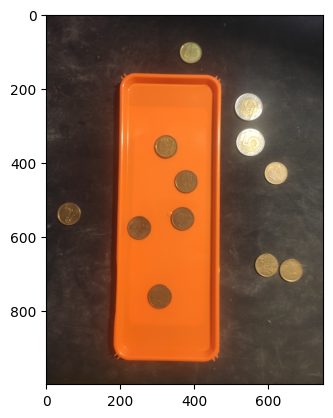

In [139]:
show(files[0], cv.COLOR_BGR2RGB)

In [140]:
def detect_circles(img, r_threshold=31.205) -> Tuple[cv.Mat, np.ndarray]:
    copy_of_img = img.copy()
    gray = cv.cvtColor(copy_of_img, cv.COLOR_BGR2GRAY)
    gray = cv.medianBlur(gray, 3)

    # Using HOUGH_GRADIENT_ALT
    # cv_circles: cv.UMat = cv.HoughCircles(
    #     gray,
    #     cv.HOUGH_GRADIENT_ALT,
    #     2,
    #     20,
    #     param1=300,
    #     param2=0.70,
    #     minRadius=20,
    #     maxRadius=80,
    # )

    # Using HOUGH_GRADIENT
    cv_circles = cv.HoughCircles(
        image=gray,
        method=cv.HOUGH_GRADIENT,
        dp=1,
        minDist=10,
        param1=100,
        param2=35,
        minRadius=20,
        maxRadius=40,
    )

    min_radius = np.min(cv_circles[0][2])
    max_radius = np.max(cv_circles[0][2])

    # print(cv_circles)
    if cv_circles is not None:
        np_circles = np.uint16(np.around(cv_circles))
        for circle in np_circles[0]:
            x, y, r = circle

            center_color = (0, 255, 0)
            if r >= r_threshold:
                center_color = (0, 0, 255)

            cv.circle(copy_of_img, (x, y), r, (0, 255, 0), 2)
            cv.circle(copy_of_img, (x, y), 2, center_color, 3)

    return copy_of_img, cv_circles

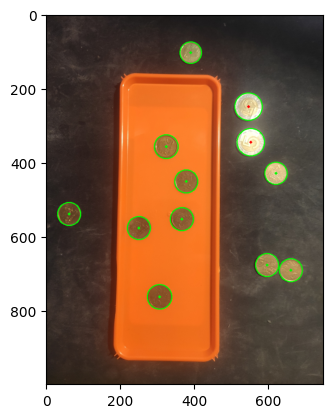

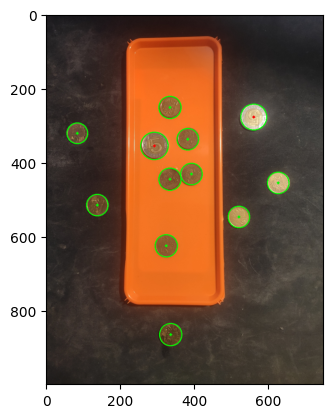

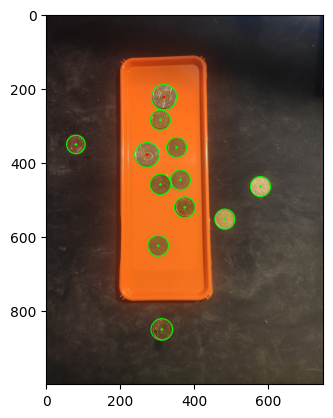

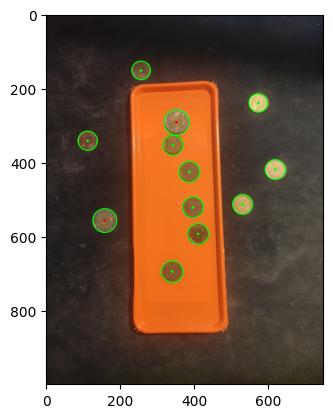

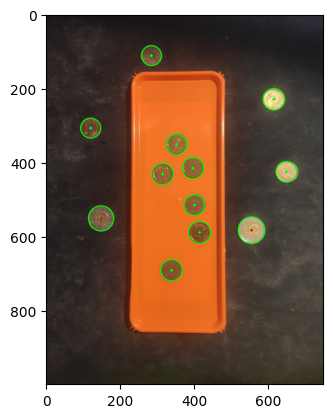

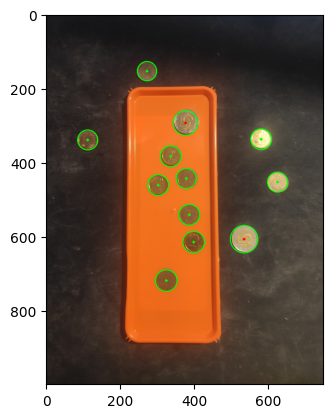

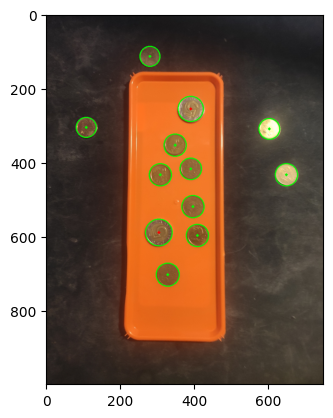

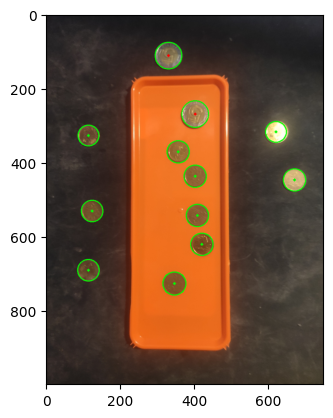

[None, None, None, None, None, None, None, None]

In [141]:
[
    show(detect_circles(file, 36 if i == 0 else 31.205)[0], cv.COLOR_BGR2RGB)
    for i, file in enumerate(files)
]

# test_img, test_circles = detect_circles(files[0])
# test_circles

### Zad. 2 - 3p
Oblicz powierzchnię monet i przelicz ile jest monet 5 zł a ile 5 gr.

Map of image of map of circles of map of tuples of circle's x, y, r and circle area.

In [142]:
images_with_circles: Dict[str, Dict[str, Dict[Tuple[float, float, float], float]]] = {}

coins_count: Dict[str, Dict[str, int]] = {}

for i, file in enumerate(files):
    r_threshold = 36 if i == 0 else 31.205

    circles_of_image = detect_circles(file, r_threshold=r_threshold)[1][0]
    radius_of_circle: List[float] = circles_of_image[:, 2]

    circles: Dict[Tuple[float, float, float], float] = {
        tuple(circles_of_image[j]): np.pi * radius_of_circle[j] ** 2
        for j in range(len(circles_of_image))
    }

    images_with_circles[f"tray{i+1}"] = {
        "circles": circles,
    }

    # Counts of coins

    radiuses_for_big = np.copy(radius_of_circle)
    radiuses_for_small = radius_of_circle

    radiuses_for_big[radiuses_for_big <= r_threshold] = 0
    radiuses_for_big[radiuses_for_big >= r_threshold] = 1

    radiuses_for_small[radiuses_for_small <= r_threshold] = 1
    radiuses_for_small[radiuses_for_small >= r_threshold] = 0

    big_count = np.sum(radiuses_for_big)
    small_count = np.sum(radiuses_for_small)

    coins_count_per_image: Dict[str, int] = {"Big": big_count, "Small": small_count}
    coins_count[f"tray{i+1}"] = coins_count_per_image


print(images_with_circles)

print(coins_count)

{'tray1': {'circles': {(546.5, 250.5, 36.6): 4208.351504144645, (660.5, 692.5, 30.8): 2980.240307255772, (377.5, 452.5, 31.3): 3077.7867567528906, (61.5, 539.5, 31.0): 3019.0705400997913, (595.5, 678.5, 31.3): 3077.7867567528906, (551.5, 345.5, 37.4): 4394.334498703275, (323.5, 358.5, 31.8): 3176.9040025768036, (366.5, 553.5, 31.3): 3077.7867567528906, (249.5, 578.5, 31.4): 3097.4846174724603, (305.5, 764.5, 33.1): 3441.960009857245, (619.5, 429.5, 30.5): 2922.466566001905, (389.5, 104.5, 29.0): 2642.079421669016}}, 'tray2': {'circles': {(324.5, 626.5, 30.4): 2903.334193877456, (137.5, 515.5, 28.6): 2569.6971954800742, (559.5, 278.5, 35.3): 3914.7070204944516, (335.5, 866.5, 30.4): 2903.334193877456, (292.5, 355.5, 37.4): 4394.334498703275, (392.5, 432.5, 28.6): 2569.6971954800742, (333.5, 251.5, 30.2): 2865.2583085494734, (520.5, 548.5, 28.9): 2623.889530935912, (83.5, 322.5, 28.0): 2463.0086404143976, (333.5, 445.5, 29.6): 2752.537890315845, (626.5, 455.5, 29.4): 2715.4669555896317, 

### Zad. 3 - 5p
Określ krawędzie tacy i wylicz jej powierzchnię. O ile mniejsze są monety 5 zł w stosunku do tacy?

In [143]:
def get_rect(img):
    copy_of_img = img.copy()


    gray = cv.cvtColor(copy_of_img, cv.COLOR_BGR2GRAY)
    gray = cv.medianBlur(gray, 3)

    edges = cv.Canny(gray, 500, 650, apertureSize=5)

    cv_lines = cv.HoughLinesP(edges, 3, np.pi / 180, 90, minLineLength=70, maxLineGap=5)

    x_coords = [line[0][0] for line in cv_lines]

    y_coords = [line[0][1] for line in cv_lines]

    low_x = min(x_coords)
    low_y = min(y_coords)

    high_x = max(x_coords)
    high_y = max(y_coords)


    low_point_cords = (low_x, low_y)
    high_point_cords = (high_x, high_y)

    cv.rectangle(copy_of_img, (low_x, low_y), (high_x, high_y), (255, 255, 255), 3)
    return (copy_of_img, low_point_cords, high_point_cords)

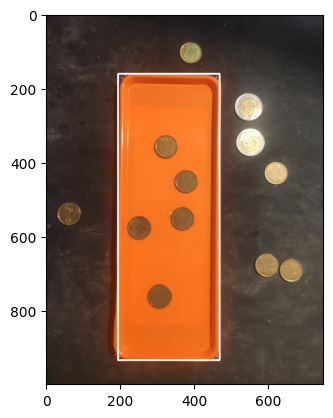

212076
208859.00912272406


In [144]:
img, low, high = get_rect(files[0])


show(img, cv.COLOR_BGR2RGB)

rectangle_area = (high[0] - low[0]) * (high[1] - low[1])

print(rectangle_area)
print(rectangle_area - np.pi * 32**2)

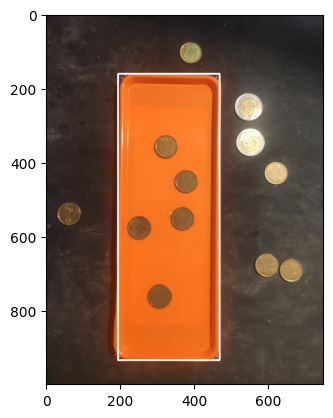

212076
208859.00912272406


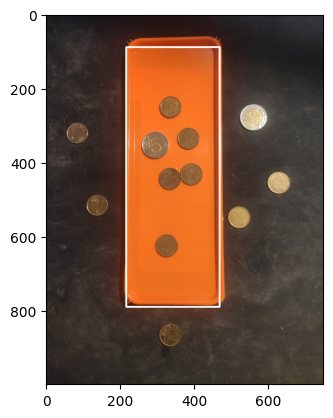

176904
173687.00912272406


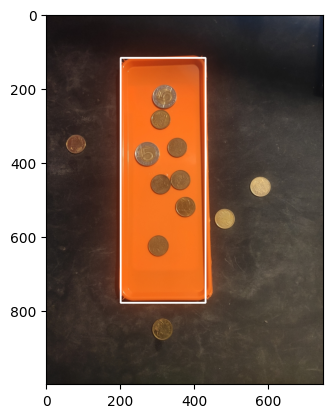

151598
148381.00912272406


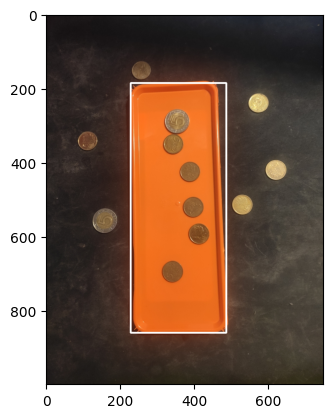

174150
170933.00912272406


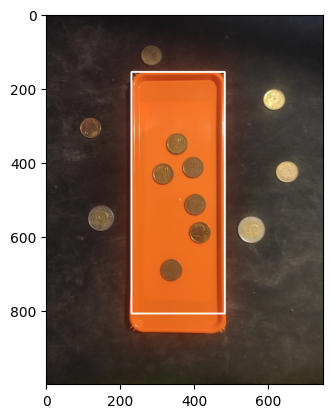

164556
161339.00912272406


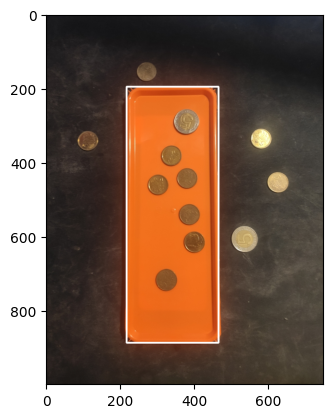

171616
168399.00912272406


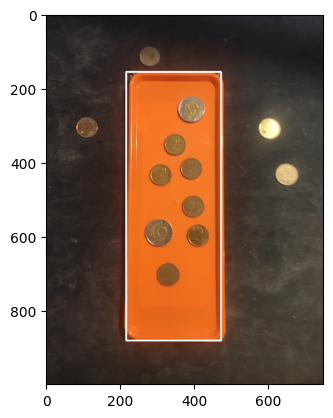

185856
182639.00912272406


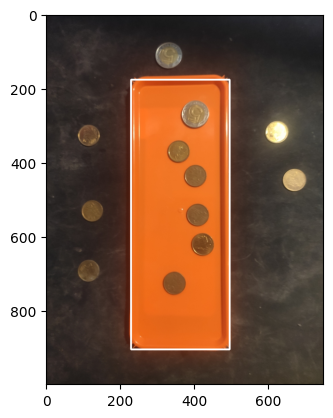

193914
190697.00912272406


In [145]:
for file in files:
    img, low, high = get_rect(file)

    show(img, cv.COLOR_BGR2RGB)

    rectangle_area = (high[0] - low[0]) * (high[1] - low[1])

    print(rectangle_area)
    print(rectangle_area - np.pi * 32**2)

### Zad. 4 - 2p
Oblicz jaka kwota leży na tacy a jaka poza nią.

In [152]:
def count_coins(img, lower_left, upper_right):
    inside_count: Dict[str, int] = {"Big": 0, "Small": 0}
    outside_count: Dict[str, int] = {"Big": 0, "Small": 0}

    r_threshold = 36 if i == 0 else 31.205

    _, circles_of_image = detect_circles(img, r_threshold=r_threshold)
    radius_of_circles: List[float] = circles_of_image[:, 2]
    # print(circles_of_image)

    for j in range(len(circles_of_image[0])):
        circle_x, circle_y, circle_radius = circles_of_image[0][j]
        if (
            lower_left[0] <= circle_x <= upper_right[0]
            and lower_left[1] <= circle_y <= upper_right[1]
        ):
            inside_count["Small" if circle_radius <= r_threshold else "Big"] += 1
        else:
            outside_count["Small" if circle_radius <= r_threshold else "Big"] += 1

    # print(f"File {files[files.index(img)] + 1}")
    print(f"Inside: {inside_count}")
    print(f"Outside: {outside_count}")
    print(
        f"Total coins count: {sum(inside_count.values()) + sum(outside_count.values())}"
    )

    inside_money = round(inside_count["Big"] * 5 + inside_count["Small"] * 0.05, 2)
    outside_money = round(outside_count["Big"] * 5 + outside_count["Small"] * 0.05, 2)

    print(f"Money inside: {inside_money}")
    print(f"Money outside: {outside_money}")

    print(f"Money sum: {round(inside_money + outside_money, 2)}")

    print("=" * 80)

In [153]:
for i, file in enumerate(files):
    _, lower_left, upper_right = get_rect(file)
    print(f"File {i + 1}")
    count_coins(file, lower_left, upper_right)

File 1
Inside: {'Big': 0, 'Small': 5}
Outside: {'Big': 2, 'Small': 5}
Total coins count: 12
Money inside: 0.25
Money outside: 10.25
Money sum: 10.5
File 2
Inside: {'Big': 1, 'Small': 5}
Outside: {'Big': 1, 'Small': 5}
Total coins count: 12
Money inside: 5.25
Money outside: 5.25
Money sum: 10.5
File 3
Inside: {'Big': 2, 'Small': 6}
Outside: {'Big': 0, 'Small': 4}
Total coins count: 12
Money inside: 10.3
Money outside: 0.2
Money sum: 10.5
File 4
Inside: {'Big': 1, 'Small': 5}
Outside: {'Big': 1, 'Small': 5}
Total coins count: 12
Money inside: 5.25
Money outside: 5.25
Money sum: 10.5
File 5
Inside: {'Big': 0, 'Small': 6}
Outside: {'Big': 2, 'Small': 4}
Total coins count: 12
Money inside: 0.3
Money outside: 10.2
Money sum: 10.5
File 6
Inside: {'Big': 1, 'Small': 6}
Outside: {'Big': 1, 'Small': 4}
Total coins count: 12
Money inside: 5.3
Money outside: 5.2
Money sum: 10.5
File 7
Inside: {'Big': 2, 'Small': 6}
Outside: {'Big': 0, 'Small': 4}
Total coins count: 12
Money inside: 10.3
Money outs